#Importing libraries

In [63]:
pip install seaborn

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from seaborn import lineplot
%matplotlib inline

#Loading data

In [65]:
df=pd.read_csv('/content/climate-ds.csv',index_col=0)
df.head()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.0,16.37,36613
1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,Albania,Soybeans,1990,1485,121.0,16.37,7000


In [66]:
df.shape

(28242, 7)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   average_rain_fall_mm_per_year  28242 non-null  int64  
 4   pesticides_tonnes              28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
 6   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.7+ MB


In [68]:
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [69]:
print(f"Area has {df.Area.nunique()} unique value\nThere names :\n{df.Area.unique().tolist()}")

Area has 101 unique value
There names :
['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chile', 'Colombia', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway', 'Pakistan', 'Papua New Guinea', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', '

In [70]:
print(f"Area has {df.Item.nunique()}unique value\nThere names:\n{df.Item.unique().tolist()}")

Area has 10unique value
There names:
['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat', 'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams']


#Data Cleaning

In [71]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [72]:
df.isnull().sum().any()

False

In [73]:
for column_name in df.columns:
    column = df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Area  is :  0
Count of zeros in column  Item  is :  0
Count of zeros in column  Year  is :  0
Count of zeros in column  average_rain_fall_mm_per_year  is :  0
Count of zeros in column  pesticides_tonnes  is :  0
Count of zeros in column  avg_temp  is :  0
Count of zeros in column  hg/ha_yield  is :  0


#Remove Duplicates

In [74]:
df.duplicated().sum()

2310

In [75]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

#Remove Outliers

In [76]:
for x, y in enumerate(df.columns):
   print(x,y)

0 Area
1 Item
2 Year
3 average_rain_fall_mm_per_year
4 pesticides_tonnes
5 avg_temp
6 hg/ha_yield


In [77]:
def hist_box():
    for i in df.columns[3:]:
        plt.subplots(nrows=1,ncols=2,figsize=(15,6))
        plt.subplot(1,2,1)
        plt.hist(df[i])
        plt.title(i);
        plt.subplot(1,2,2)
        sns.boxplot(data=df[i])
        plt.title(i);
        yield()

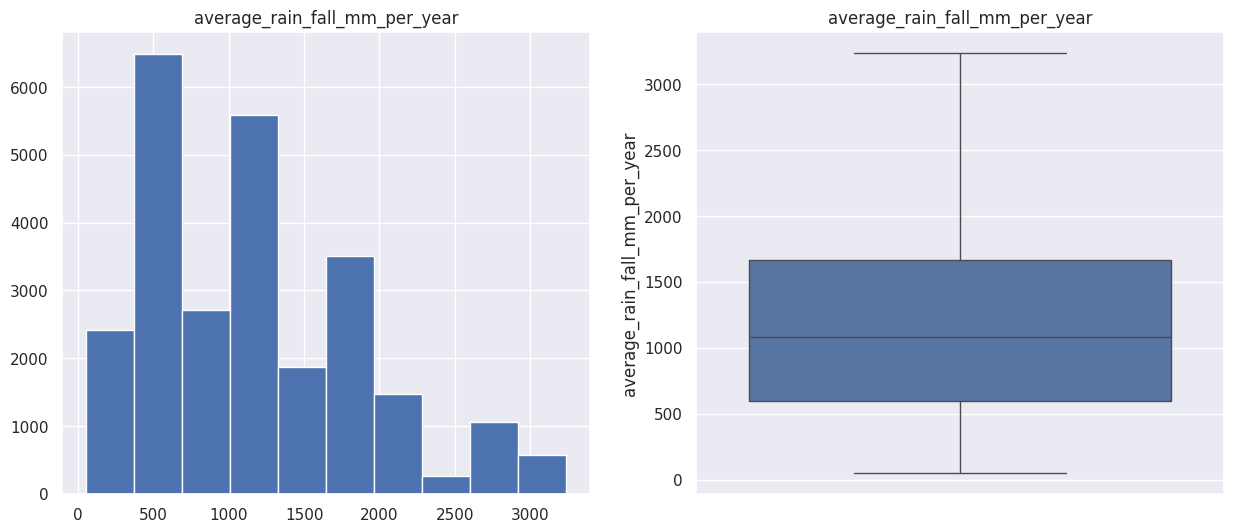

In [78]:
hibox = hist_box()
next(hibox);

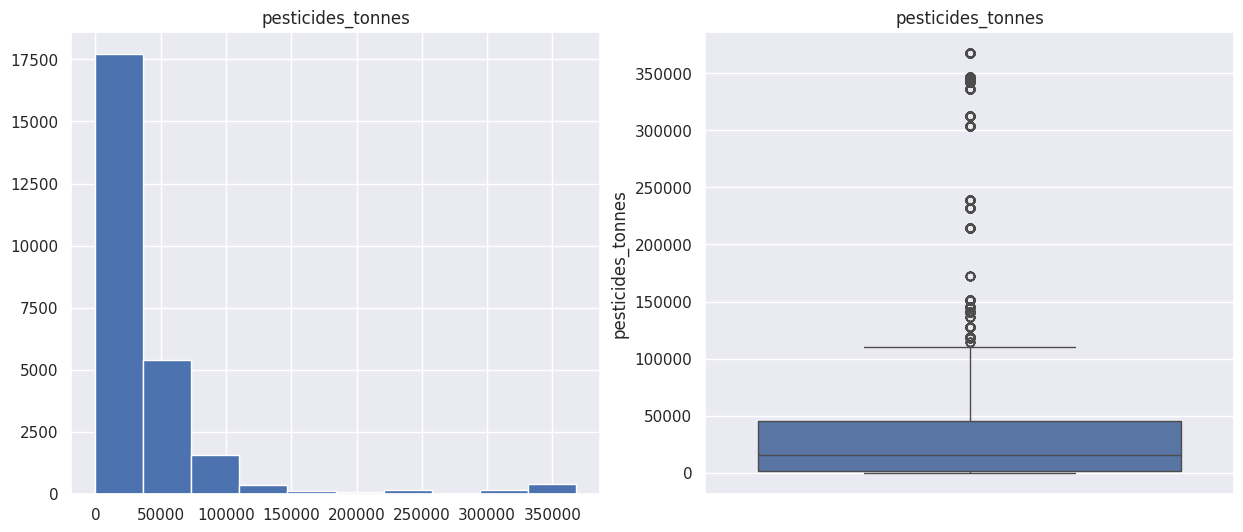

In [79]:
next(hibox);

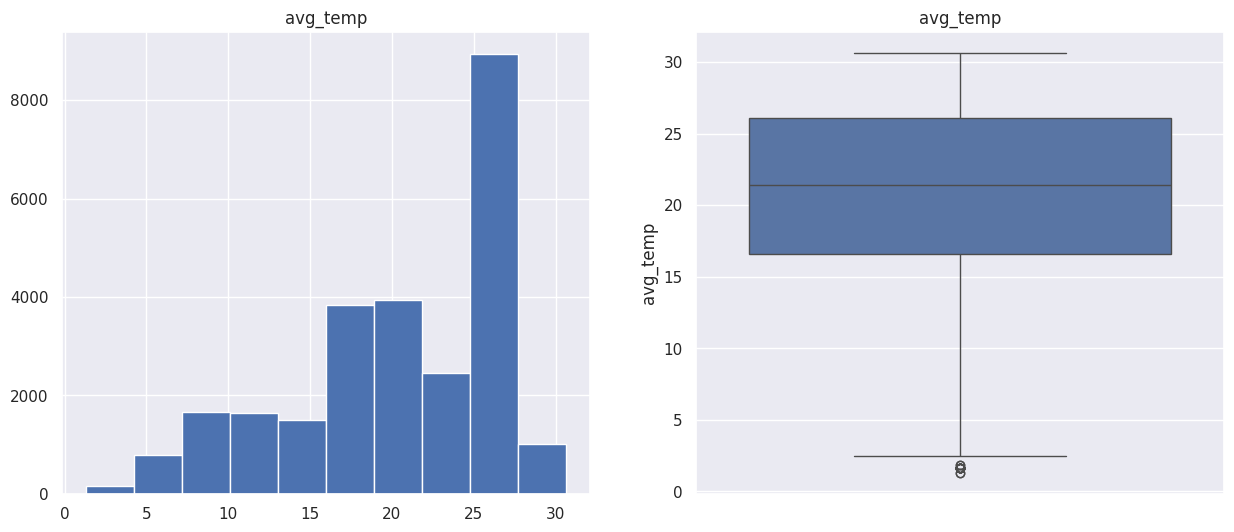

In [80]:
next(hibox);

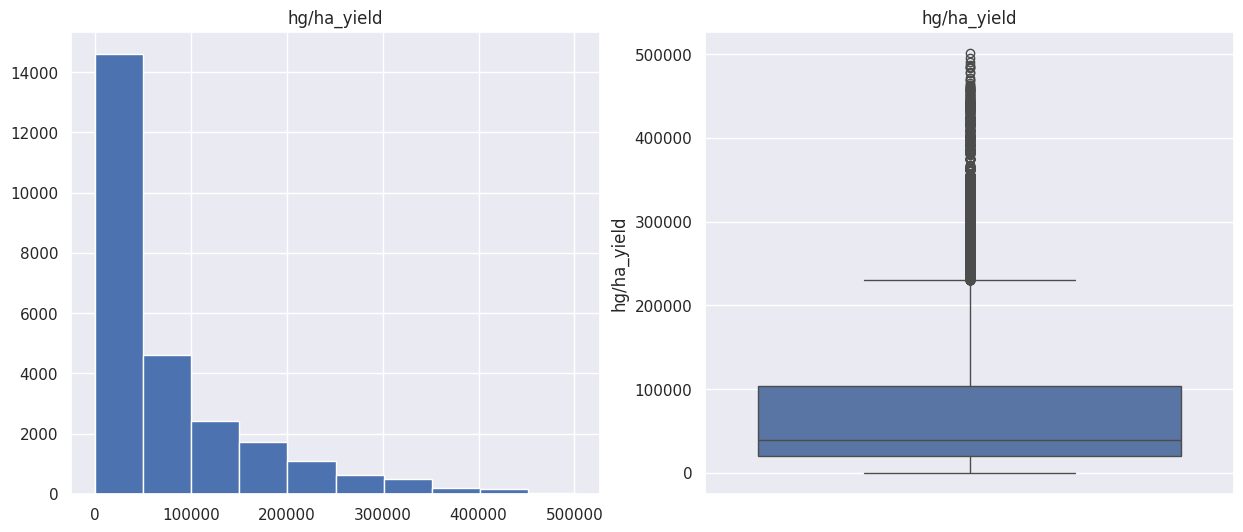

In [81]:
next(hibox);

In [82]:
q_hi = df["hg/ha_yield"].quantile(0.90)
df[(df["hg/ha_yield"] < q_hi)]

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,Albania,Maize,1990,1485,121.00,16.37,36613
1,Albania,Potatoes,1990,1485,121.00,16.37,66667
2,Albania,"Rice, paddy",1990,1485,121.00,16.37,23333
3,Albania,Sorghum,1990,1485,121.00,16.37,12500
4,Albania,Soybeans,1990,1485,121.00,16.37,7000
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657,2550.07,19.76,22581
28238,Zimbabwe,Sorghum,2013,657,2550.07,19.76,3066
28239,Zimbabwe,Soybeans,2013,657,2550.07,19.76,13142
28240,Zimbabwe,Sweet potatoes,2013,657,2550.07,19.76,22222


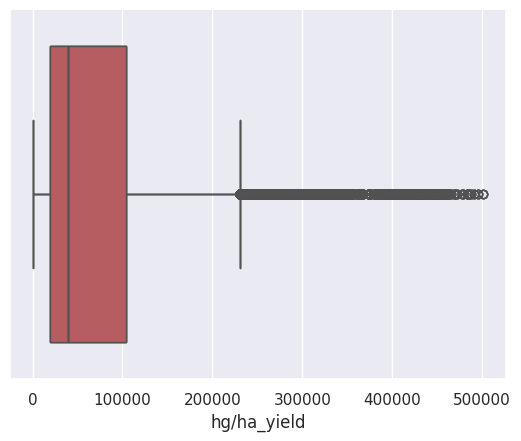

In [83]:
sns.set()
for i in df.columns[3:]:
    sns.boxplot(data = df, x = df["hg/ha_yield"]);

#Histogram

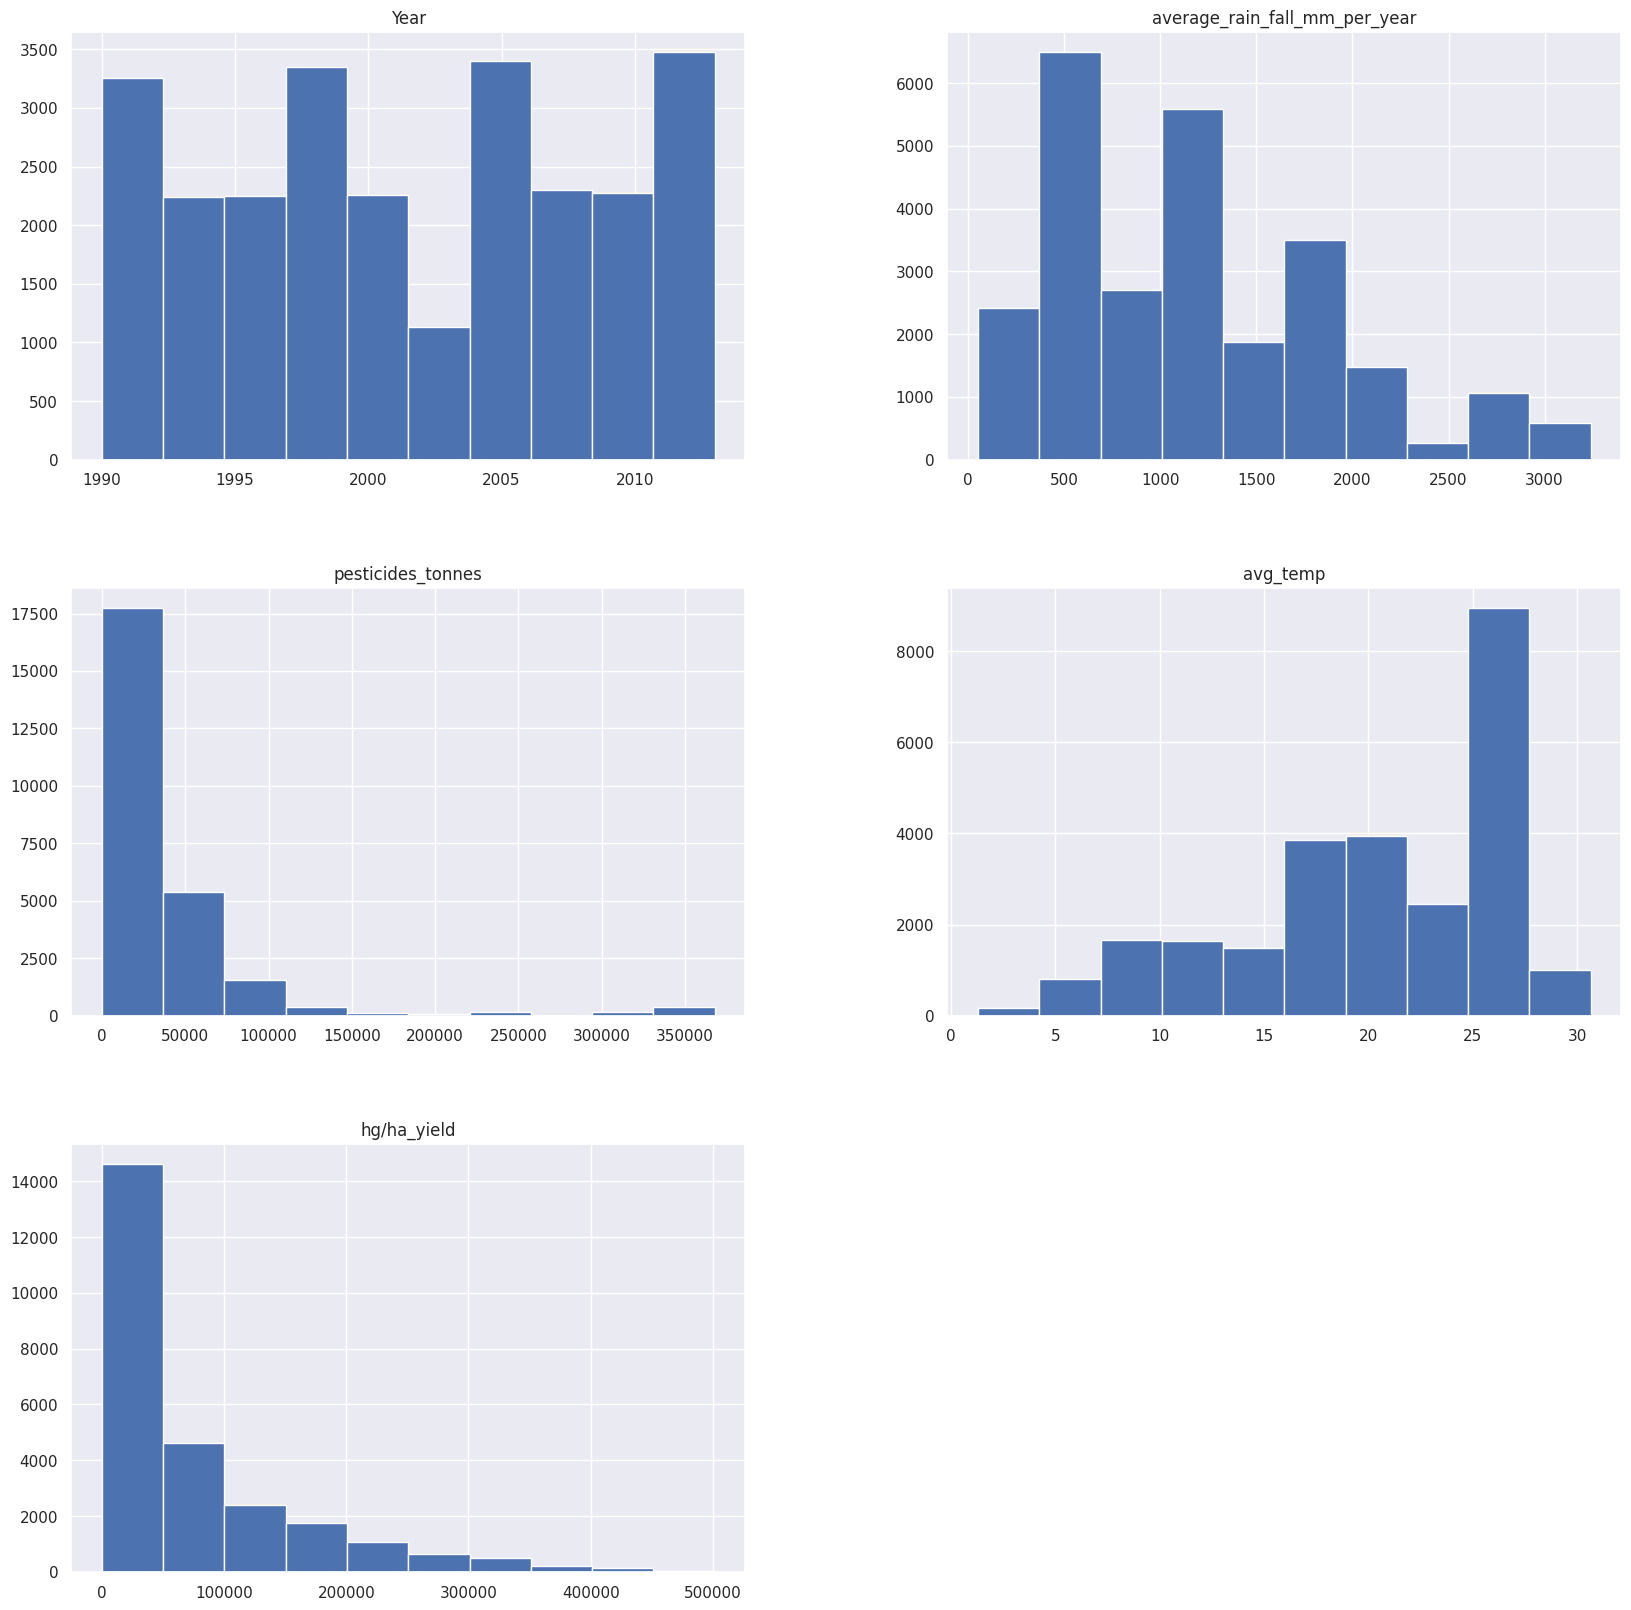

In [84]:
sns.set()
df.hist(figsize=(20,20));

#Bar PLot

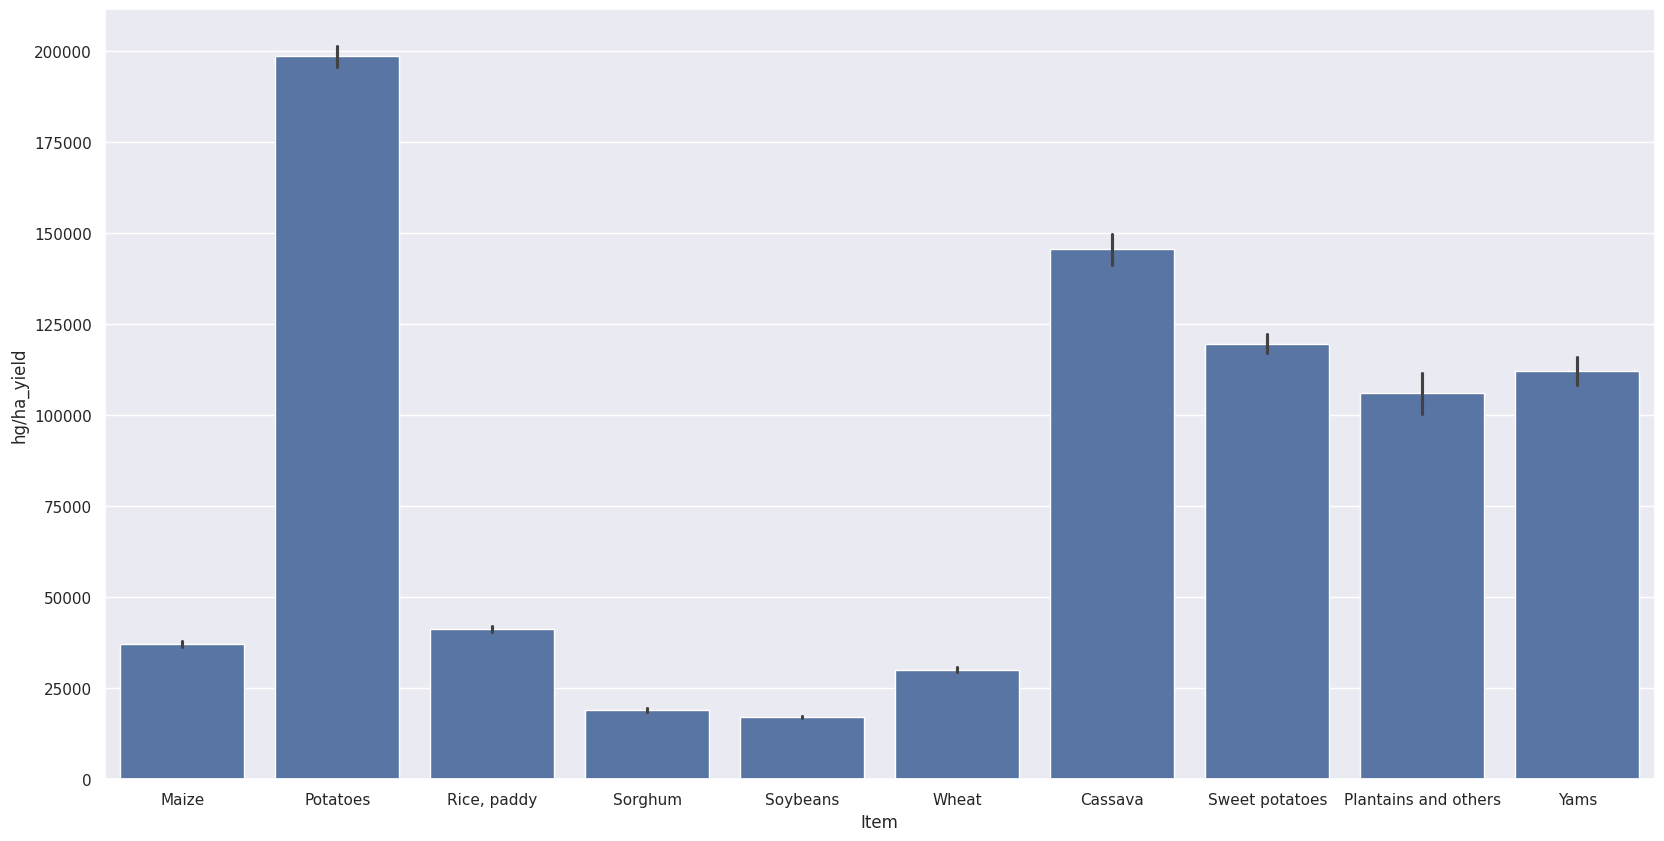

In [85]:
sns.set()
plt.figure(figsize=(20,10))
sns.barplot(data=df, x = df.Item, y = df['hg/ha_yield'])
plt.show()

In [86]:
ST_df=df.groupby(df.Area)[['hg/ha_yield']].sum()
ST_df

,hg/ha_yield
Area,
Albania,5711536
Algeria,6711464
Angola,5722563
Argentina,32864032
Armenia,4524100
...,...
Ukraine,5496901
United Kingdom,44335992
Uruguay,9539820


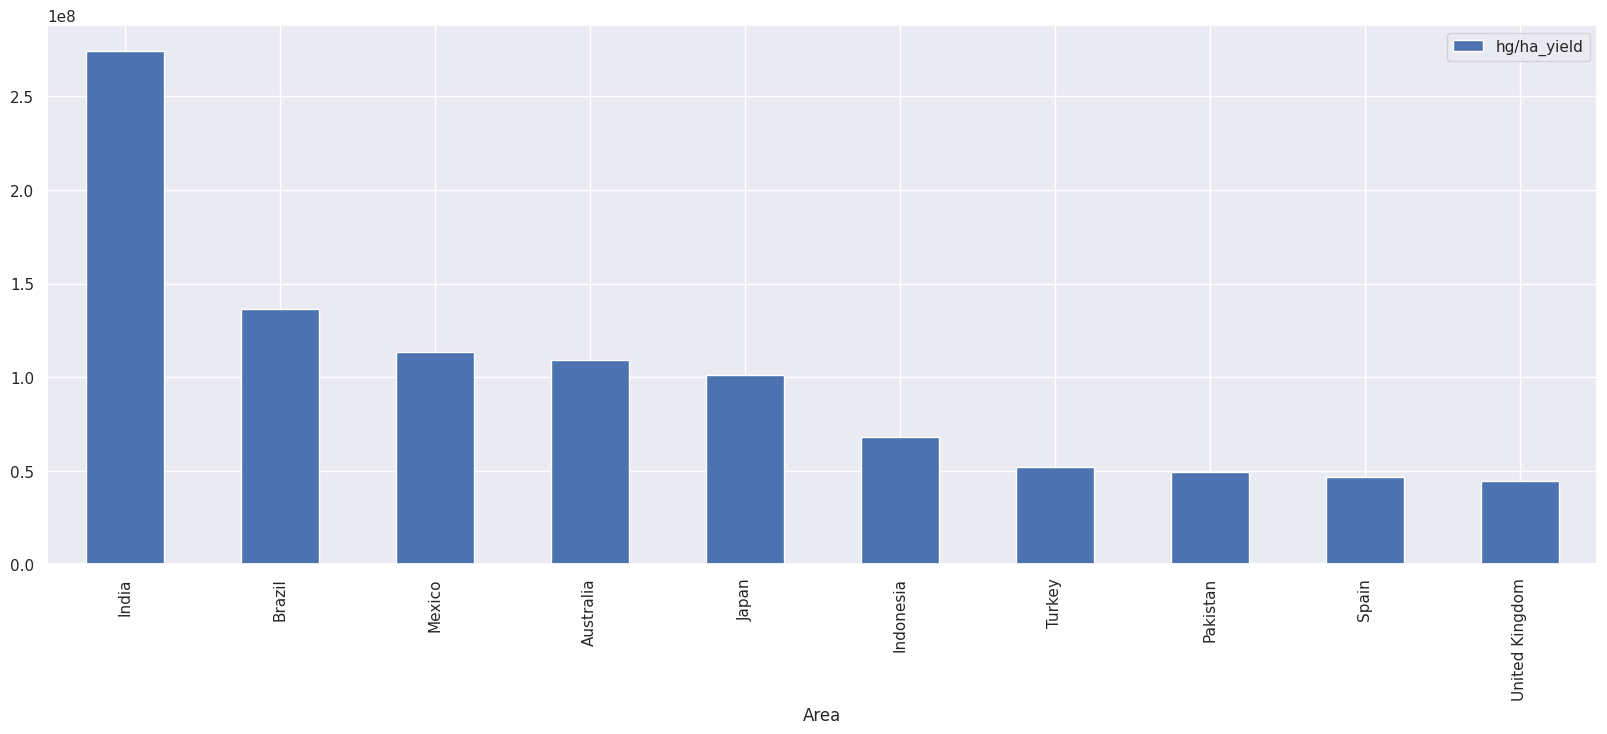

In [87]:
d10 = ST_df.nlargest(10,'hg/ha_yield')
T10 = d10.loc[:,['hg/ha_yield']].head(10)
sns.set()
T10.plot.bar(figsize=(20,7));

#Scatter Plot

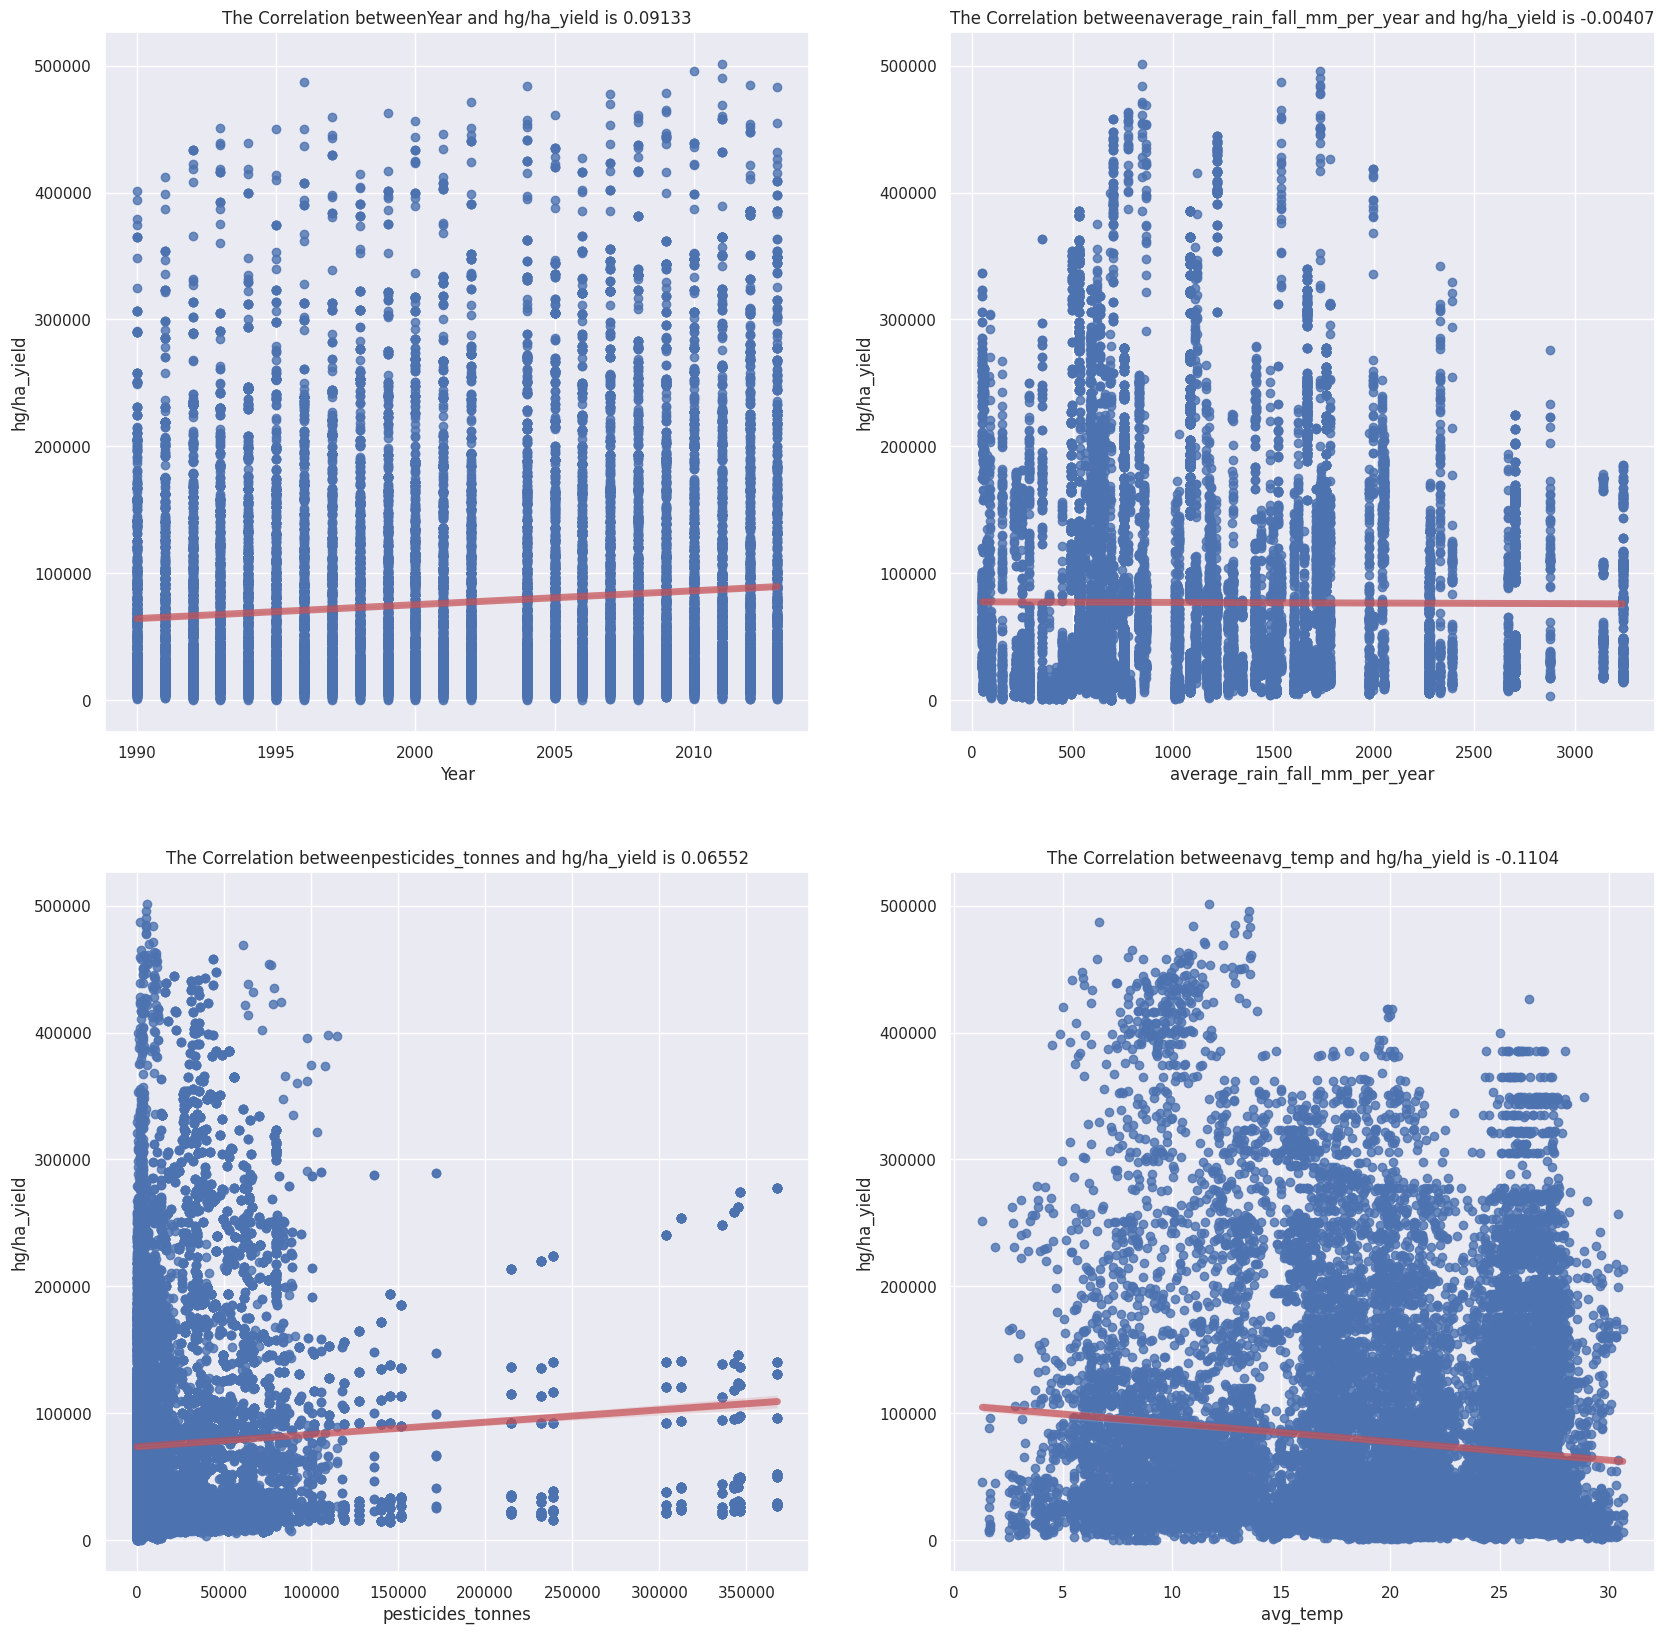

In [88]:
fig,plotcanvas=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
continuouscols = df.columns[2:].tolist()
for i in range(0,len(continuouscols)-1):
    x = 0 if ((i == 0) or (i == 1)) else 1
    y = 0 if ((i == 0) or (i == 2)) else 1
    sns.regplot(data = df, x = continuouscols[i], y = 'hg/ha_yield',line_kws={"color":"r","alpha":0.7,"lw":5}, ax=plotcanvas[x,y])
    cor = round(df['hg/ha_yield'].corr(df[continuouscols[i]]),5)
    plotcanvas[x,y].set_title(f'The Correlation between{continuouscols[i]} and hg/ha_yield is {cor}')


#HeatMap

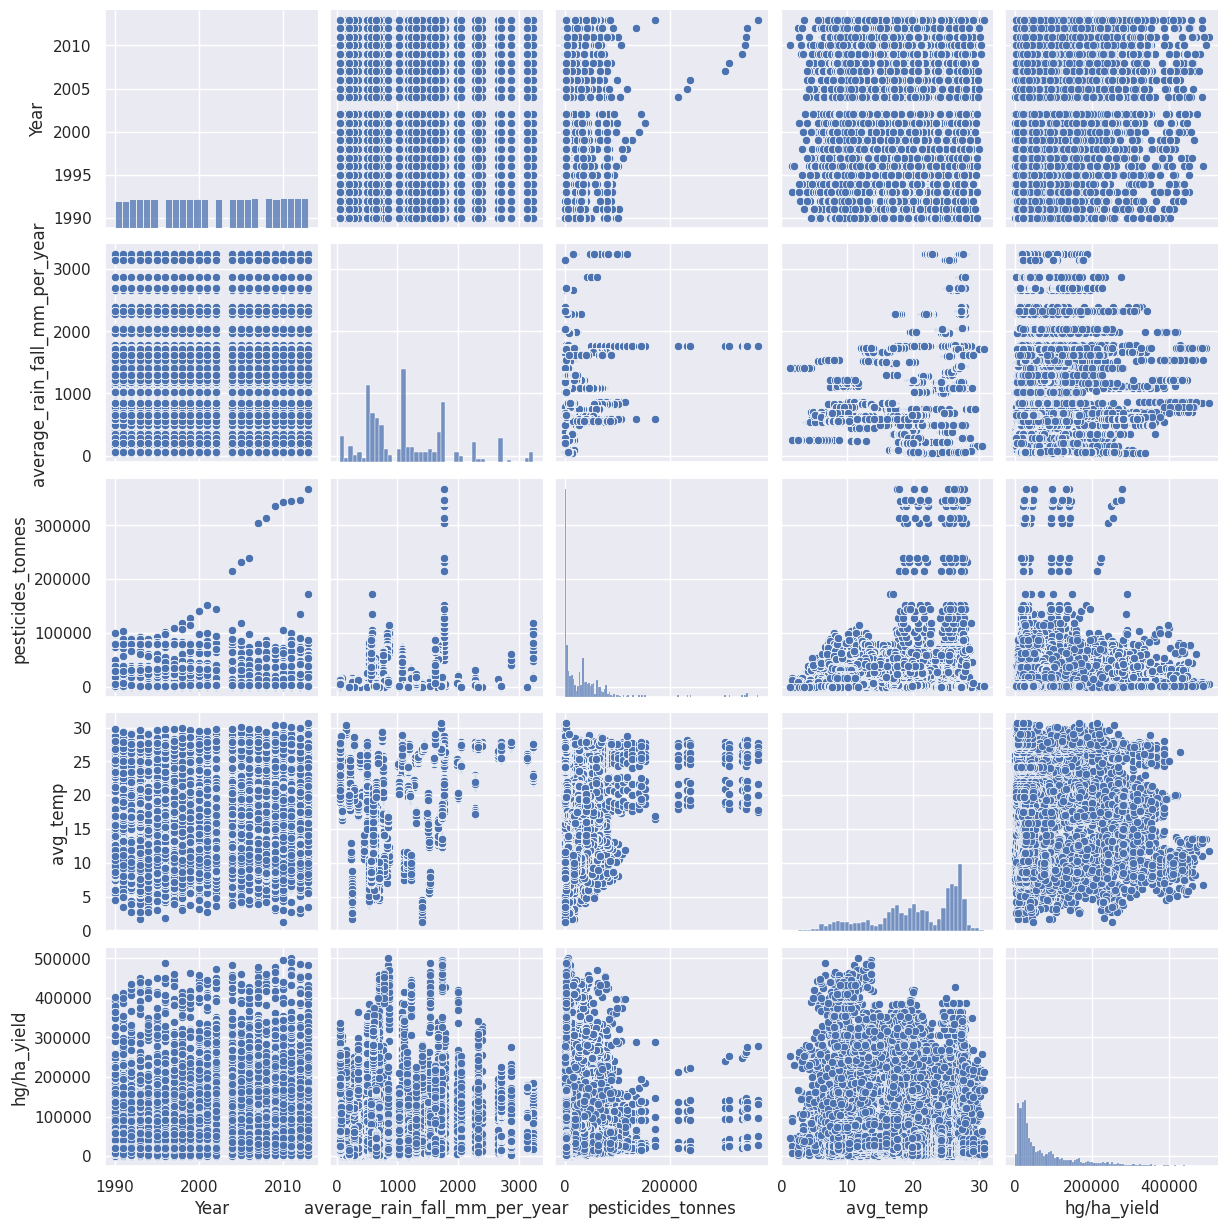

In [92]:
sns.pairplot(df)
plt.show()

#One Hot Encoding

In [97]:
print(df.columns)
df = pd.get_dummies(df, columns=['Area', 'Item'])
df.rename(columns={x: x[5:] for x in df.columns[6:]}, inplace=True)
print(df.head(10))

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'hg/ha_yield', 'Area_Albania', 'Area_Algeria',
       'Area_Angola', 'Area_Argentina', 'Area_Armenia',
       ...
       'Item_Cassava', 'Item_Maize', 'Item_Plantains and others',
       'Item_Potatoes', 'Item_Rice, paddy', 'Item_Sorghum', 'Item_Soybeans',
       'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams'],
      dtype='object', length=116)


KeyError: "None of [Index(['Area', 'Item'], dtype='object')] are in the [columns]"

In [ ]:
#split the data from the traget data
x = df.drop(labels=['hg/ha_yield'], axis=1)
y = df['hg/ha_yield']

In [ ]:
y.describe()

#Dimension Reduction

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = scaler.fir_transform(x)

AttributeError: 'StandardScaler' object has no attribute 'fir_transform'

#Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=40, shuffle=True)

In [ ]:
del df
del x
del y

In [ ]:
print('Shape of the x_train data :', x_train.shape)
print('Shape of y_train data :', y_train.shape)
print('Shape of the x_test data :', x_test.shape)
print('Shape of the y_test data :', y_test.shape)

In [ ]:
df_models = pd.DataFrame(columns=["Model","MAE","MEDAE","MSE","RMSE","Max Error","R2 score","EVS","MAPE" ])

#Evaluation Function

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizesSearchCV
def regression_report(y_true, y_pred):

  error = y_true - y_pred

  mae = mean_absolute_error(y_true, y_pred)
  medae = median_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true,y_pred)
  rmse = np.sqrt(mean_squared_error(y_true,y_pred))
  maxerr = max_error(y_true,y_pred)
  r_squared = r2_score(y_true,y_pred)
  evs = explained_variance_score(y_true,y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  metrics = [
      ('Mean Absolute Error', mae),
      ('Median Absolute Error', medae),
      ('Mean Squared Error', mse),
      ('Root Mean Squared Error', rmse),
      ('Max error',maxerr),
      ('R2 score', r_squared),
      ('Explained variance score', evs),
      ('Mean Absolute Percentage Error', mape)
]

print('Regression Report:')
for metric_name, metric_value in metrics:
   print(f'\t\t\t{metric_name:30}: {metric_value: >20.3f}')
return mae, medae, mse, rmse, maxerr, r_squared, evs, mape


##Regression Model

#Gradient Boosting Regressor

In [ ]:
import lightgbm as lgb
import scipy as sp
lgbm = lgb.LGBMRedressor(
    objective='regression',n_jobs=1
)

param_dist = {'boosting_type':['gbdt','dart','rf'],
              'num_leaves':sp.stats.randint(2,1001),
              'subsample_for_bin':sp.state.randit(10,1001),
              'min_split_gain':sp.stats.uniform(0,5.0),
              'min_child_weight':sp.stats.uniform(1e-6,1e-2),
              'reg_alpha':sp.stats.uniform(0, 1e-2),
              'reg_lambda':sp.stats.uniform(0, 1e-2),
              'tree_learner': ['data','feature','serial','voting'],
              'application':['regression_l1','regression_12','regression'],
              'bagging_freq':sp.stats.randit(1,11),
              'bagging_fraction':sp.stats.uniform(1e-3,0.99),
              'feature_fraction':sp.stats.uniform(1e-3,0.99),
              'learning_rate':sp.stats.uniform(1e-6,0.99),
              'max_depth':sp.stats.randint(1,501),
              'n_estimators':sp.stats.randit(100,20001),
}

rscv = RandomizedSearchCV (
                            estimator = lgbm,
                            param_distributions=param_dist,
                            cv=3,
                            verbose=0
                           )

In [ ]:
rscv.fit(x_train, y_train)

In [ ]:
print("The best parameters are %s with a score of %0,2f"%(rscv.best_params_,rscv.best_score_))
gbr_pred = rscv.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, gbr_pred)
row = {"Model": "GBRegressor", "MAE":mae,"MEDAE":medae, "MSE": mse,"RMSE":rmse,"Max Error":maxerr,"R2score":r_squared,"EVS":evs,"MAPE":mape}
df_models = df_models.append(row,ignore_index=True)

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, gbr_pred, s=20)
plt.title('Gradient Boosting Regressor')
plt.xlabel('Actual Crop Production')
plt.ylabel('Predicted Crop Production')

plt.plot([min(y_test), max(y_test)],[min(y_test),max(y_test)], color='r',linewidth=4)
plt.tight_layout()

#Linear Regression

In [ ]:
from sklearn.linear_model import SGDRegressor
param_grid = {
    'learning_rate': ['constant',"optimal","invscaling","adaptive"]
}
sgd = SGDRegressor()
model = GridSearchCV(estimator=sgd, param_grid=param_grid,cv=5,verbose=0)
model.fit(x_train, y_train)
sdg_pred = model.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, sgd_pred)
row = {"Model":"SGDRegressor","MAE":mae,"MEDAE":medae,"MSE":mse,"RMSE":rmse,"Max Error":maxerr,"R2 Score":r_squared,"EVS":evs,"MAPE":mape}
df_models = df_models.append(row, ignore_index=True)

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, rid_pred, s=0)
plt.title('Ridge Regression',fontsize=20)
plt.xlabel('Actual Crop Production',fontszie=15)
plt.ylabel('Predicted Crop Production',fontsize=15)

plt.plot([min(y_test), max(y_test)],[min(y_test),max(y_test)], color='r', linewidth = 4)
plt.tight_layout()

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=2,max_iter=10000, tol=0.001)
model.fit(x_train, y_train)

In [ ]:
lass_pred = model.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, lass_pred)
report(y_test, lass_pred)
row = {"Model": "LassoRegression","MAE":mae,"MEDAE":medae,"MSE":mse,,"RMSE":rmse,"Max Error":maxerr,"R2 Score":r_squared,"EVS":evs,"MAPE":mape}
df_models = df_models.append(row, ignore_index=True)

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, lass_pred, s=20)
plt.title('Lasso Regression', fontsize=20)
plt.xlabel('Actual Crop Producation', fontsize=15)
plt.ylabel('Predicated Crop Producation', fontsize=15)

plt.plot([min(y_test),max(y_test)], [min(y_test), max(y_test)],color='r',linewidth = 4)
plt.tight_layout()

#Support Vector Regression

In [ ]:
from sklearn.svm import SVR
param_dist = { 'kernel':['rbf'],'C':sp.stats.randit(1, 10001),"epsilon":sp.stats.uniform(0.00001,0.99),'gamma':['scale','auto']
              }

svr = SVR()
svrcv = RandomizedSearchCV ( estimator = svr, param_distribution=param_dist,cv=3,verbose=0)
svrcv.fit(x_train, y_train)

In [ ]:
svr_pred = svrcv.predict(x_test)
mae, medae, mse, rmse, maxerr, r_squared, evs, mape = regression_report(y_test, svr_pred)
row = {"Model": "SupportVectorRegressor","MAE":mae,"MEDAE":  medae, "MSE": mse, "RMSE":rmse,"Max Error":maxerr,"R2 score":r_squared,"EVS":evs,"MAPE":mape}
df_models = df_models.append(row, ignore_index = True)

In [ ]:
print("The best parameters are %s with a score of %0.2f" % (svrcv.best_params_,svrcv.best_score_))

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, svr_pred, s=20)
plt.title('Support Vector Regressor', fontsize=20)
plt.xlabel('Actual Crop Production',fontsize=15)
plt.ylabel('Predicted Crop Production', fontsize=15)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'r', linewidth = 4)
plt.tight_layout()

#Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model.fit(x_train, y_train)
en_pred = model.predict(x_test)
mae, medae, mse, rmse, maxerr,r_squared, evs, mape = regression_report(y_test, en_pred)
row = {"Model": "ElasticNet", "MAE": mae, "MEDAE": medae, "MSE": mse, "RMSE": rmse, "Max Error": maxerr, "R2 Score": r_squared,"EVS": evs, "MAPE":mape}
df_models = df_models.append(row, ignore_index=True)

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, en_pred, s=20)
plt.title('Elastic Net', fontsize=20)
plt.xlabel('Actual Crop Production', fontsize=15)
plt.ylabel('Predicted Crop Production',fontsize=15)

plt.plot([minn(y_test), max(y_test)], [min(y_test),max(y_test)], color = 'r', linewidth=4)
plt.tight_layout()

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_grid = {'n_estimators': [int(x)for x in np.linspace(start = 100, stop = 1200, num = 12)],
               'max_features':['auto','sqrt'],'max_depth':[int(x) for x in np.linespace(5, 30, num=6)],'min_samples_split':[2,5,10,15,100],'min_samples_leaf':[1,2,4,10],'bootstrap':[True,False]
               }
rfr = RandomForestRegressor
rfrcv = RandomizesSearchCV( estimator = rfr, param_distributions=random_grid,cv=3,verbose=0 )

rfrcv.fit(x_train, y_train)

In [ ]:
print("The best parameter are %s with a score of %0.2f"%(rfrcv.best_params_,rfrcv.best_score_))
rfr_pred = rfrcv.predict(x_test)
mae,medae,mse,rmse,maxerr,r_squared,evs,mape = regression_report(y_test, rfr_pred)
report(y_test, rfr_pred)
row = {"Model": "RandomForestRegressor", "MAE":mae,"MEDAE":medae,"MSE":mse,"RMSE":rmse,"Max Error":maxerr,"r2 Score": r_squared,"EVS":evs,"MAPE":mape}
df_models = df_models.append(row, ignore_index = True)

In [ ]:
plt.figure(fogsize=(15,7))
plt.scatter(y_test, rfr_pred,s=0)
plt.title('Random Forest Regressor', fontsize=20)
plt.xlabel('Actual Crop Production', fontsize=15)
plt.ylable('Predicted Crop Production',fontsize=15)

plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='r',linewidth=4)
plt.tight_layout()

#Extreme Gradient Boosting Regressor

In [ ]:
from xgboost import XGBRegressor
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
space={'max_depth': hp.quniform("max_depth",3,18,1),'learning_rate':hp.loguniform('learning_rate',np.log(0.001),np.log(0.5)),'gamma':hp.uniform('gama',1,9),'reg_alpha':hp_uniform('reg_alpha',0.001,1.0),'reg_lambda':hp_uniform('colsample_bytree',0.5,1),'min_child_weight':hp.quniform('mini_child_weight',0,10,1),'n_estimators': hp.uniform("n_estimators",100,20001)}
def objective(space):
   rego = XGBRegressor(
    n_estimators=int(space['n_estimators']),
    max_depth=int(space['max_depth']),
    learning_rate=space['reg_alpha'],
    gamma=space['gamma'],
    reg_alpha=space['ref_alpha'],
    min_child_weight=int(space['min_child_weight']),
    reg_lambda=space['reg_lambda'],
    colsample_bytree=int(space['colsample_bytree']),
    eval_metric="rmse",
    early_stopping_rounds=10
)

evaluation = [(x_train, y_train), (x_test, y_test)]

rego.fit(x_train, y_train, eval_set=evaluation, verbose=0)

y_pred = rego.predict(x_test)
r_squared = r2_score(y_test, y_pred)

return {'loss': -r_squared, 'status': STATUS_OK}

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective, space = space,algo = tpe.suggest,max_evals = 100, trials = trials)

In [ ]:
best_hyperparams['max_depth'],best_hyperparams['n_estimators']= int(best_hyperparams['max_depth']),int(best_hyperparams['n_estimators'])

In [ ]:
model = XGBRegressor(**best_hyperparams)
model.fit(x_train, y_train)
xgb_pred = model.predict(x_test)
mae, medaem, mse, rmse, maxerr, r_squared,evs, mape = regression_report(y_test,xgb_pred)
row = {"Model":"XGBRegressor","MAE":mae,"MEDAE":medae,"MSE":mse,"RMSE":rmse,"Max Error":maxerr,"R2 Score":r_squared,"EVS":evs,"MAPE":mape}
df_models = df_models.append(row, ignore_index=True)

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, xgb_pred, s=20)
plt.title('XGB Regressor',fontsize=20)
plt.xlabel('Actual Crop Production',fontsize=15)
plt.ylabel('Predicted Crop Production',fontsize=15)

plt.plot([min(y_test),max(y_test)], [min(y_test), max(y_test)], color='r',linewidth=4)
plt.tight_layout()

#Evaluation Models

In [ ]:
df_models.sort_values(by="R2 Score")

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x=df_models.Model, y=df_models['R2 Score'])
plt.title("Models and R2 Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x=df_models.Model,y=df_models.RMSE)
plt.title("Models and RMSE", size=15)
plt.xticks(rotation=30,size=12)
plt.show()

In [ ]:
fig.plotcanvas=plt.subplots(nrows=2,ncols=2,figsize=(20,,20))
plotcanvas[0,0].scatter(y_test, gbr_pred, s=20)
c=df_models.loc[0,'R2 Score']
plotcanvas[0,0].set_title(f'Gradient Boosting Regressor with {c:0.4f}R2 Score',fontsize=20)
plotcanvas[0,0].set_ylabel('Actual Crop Production',fontsize=15)
plotcanvas[0,0].set_ylabel('Predicted Crop Production',fontsize=15)
plotcanvas[0,0].plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='r',linewidth=4)

plotcanvas[0,1].scatter(y_test,rfr_pred,s=20)
c=df_models.loc[7,'R2 Score']
plotcanvas[0,1].set_title(f'Random Forest Regressor with {c:0.4f} R2 score',fontsixe=20)
plotcanvas[0,1].set_xlabel('Actual Crop Production',fontsize=15)
plotcanvas[0,1].set_ylabel('Predicted Crop Production',fontsize=15)
plotcanvas[0,1].plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='r',linewidth=4)

plotcanvas[1,0].scatter(y_test, svr_pred, s=20)
c = df_models.loc[5,'R2 Score']
plotcanvas[1,0].set_title(f'SGD Regressor with {c:0.4f} R2 Score', fontsize=20)
plotcanvas[1,0].set_xlabel('Actual Crop Production', fontsize=15)
plotcanvas[1,0].set_ylabel('Predicted Crop Production',fontsize=15)
plotcanvas[1,0].plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='r',linewidth=4)

plotcanvas[1,1].scatter(y_test, xgb_pred, s=20)
c = df_models.loc[8,'R2 Score']
plotcanvas[1,1].set_title(f'XGB Regressor with {c:04f} R2 score', fontsize=20)
plotcanvas[1,1].set_xlabel('Actual Crop Production',fontsize=15)
plotcanvas[1,1].set_ylabe('Predicted Crop Production', fontsize=15)
plotcanvas[1,1].plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='r',linewidth=4)
plt.tight_layout():